In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive (3)\Housing.csv")

In [55]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [57]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [58]:
X = df.drop(columns='price')
y = df['price']

In [59]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [60]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
le = LabelEncoder()
cols_le = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [62]:
for col in cols_le:
    X[col] = le.fit_transform(X[col])

In [63]:
X['furnishingstatus'] = le.fit_transform(X['furnishingstatus'])

In [64]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

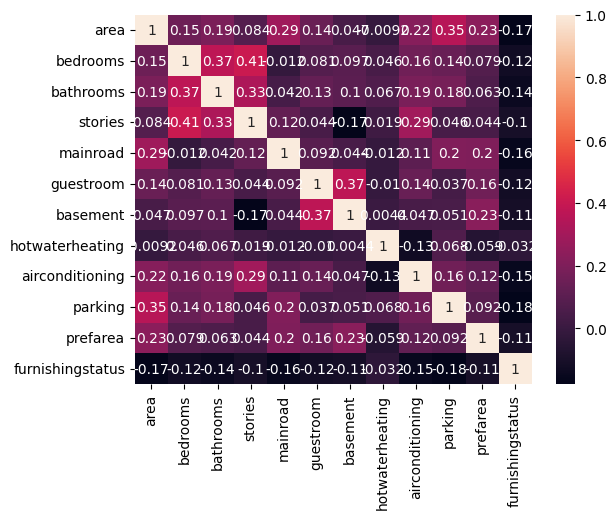

In [65]:
sns.heatmap(X.corr(),annot=True)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [71]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

<h2>LinearRegression

In [72]:
le = LinearRegression()

In [73]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [74]:
le.fit(X_train_scaled,y_train)

LinearRegression()

In [75]:
y_pred = le.predict(x_test_scaled)

In [76]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

0.6183140939593385
898629.2950371039
1602773742288.0056
1266007.007203359


<h2>RandomForest

In [77]:
rf = RandomForestRegressor()

In [78]:
rf.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [80]:
y_pred = rf.predict(x_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [81]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

-2.5407622240556154
3561519.7247706424
14868352827775.229
3855950.314484774


In [85]:
for i in range(5,25):
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(X_train_scaled,y_train)
    y_pred = rf.predict(x_test)
    print(i,r2_score(y_test,y_pred))
    print(i,mean_absolute_error(y_test,y_pred))
    print(i,mean_squared_error(y_test,y_pred))
    print(i,root_mean_squared_error(y_test,y_pred))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


5 -3.191307466893
5 3891238.773531196
5 17600119489547.27
5 4195249.633758076
6 -2.627690546024914
6 3618341.5287274406
6 15233381846946.576
6 3902996.5215135124


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


7 -3.3456202153425316
7 3957374.5139991576
7 18248108889734.49
7 4271780.529209628
8 -3.369186621778394
8 3996835.5982068363
8 18347068837790.48
8 4283347.853932772


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


9 -3.185585042713101
9 3882020.2253377805
9 17576089911633.541
9 4192384.7523376886
10 -2.8883427419793013
10 3750323.9526172094
10 16327911377468.184
10 4040781.035575695


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


11 -3.3626906683957962
11 3967435.7916319156
11 18319791059523.113
11 4280162.503868646
12 -3.41343459150265
12 4011149.8464831794
12 18532874713514.996
12 4304982.545088307


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


13 -3.4456692984438106
13 4019429.5412844038
13 18668234550118.81
13 4320675.242380386


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


14 -3.8332414241741066
14 4207290.377981652
14 20295725679689.33
14 4505077.766219949
15 -2.9507677689546
15 3782218.3834862383
15 16590046270358.281
15 4073088.0508967987


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


16 -3.0482621419275553
16 3826562.2018348626
16 16999444203446.33
16 4123038.2248344887
17 -2.478409816142201
17 3528962.339449541
17 14606522876523.623
17 3821848.0969975274


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


18 -2.1517111448932917
18 3341387.102752293
18 13234651283595.719
18 3637946.025382416


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


19 -3.614538187915336
19 4098843.6165137608
19 19377348032306.08
19 4401970.925881505


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


20 -2.6456799051621873
20 3601439.4403669727
20 15308922683035.867
20 3912661.841130136
21 -3.2343017113564123
21 3907449.4495412842
21 17780660727787.613
21 4216712.07551424


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


22 -3.473304714142598
22 4039360.5963302753
22 18784281063595.55
22 4334083.647507919


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


23 -2.668534646345494
23 3627567.4220183487
23 15404894209559.8
23 3924906.904572362
24 -2.8279846789373915
24 3720774.9394495413
24 16074456070243.318
24 4009296.2063488546


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<h2>KNN

In [88]:
from sklearn.cluster import KMeans

In [ ]:
for i in range(5,25):
    kn = KMeans(n_clusters=i)
    kn.fit(X_train_scaled,y_train)
    y_pred = kn.predict(x_test)
    print(i,r2_score(y_test,y_pred))
    print(i,mean_absolute_error(y_test,y_pred))
    print(i,mean_squared_error(y_test,y_pred))
    print(i,root_mean_squared_error(y_test,y_pred))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warni

-5.392493071813354
4758585.155963303
26843328195013.176
5181054.737697062
-5.392497604668418
4758587.155963303
26843347229357.797
5181056.57461466
-5.3924908053865375
4758584.155963303
26843318677843.863
5181053.819238309
-5.392493071813354
4758585.155963303
26843328195013.176
5181054.737697062
-5.392497604668418
4758587.155963303
26843347229357.797
5181056.57461466
-5.3924817396840306
4758580.155963303
26843280609186.613
5181050.145403595
-5.392484006108942
4758581.155963303
26843290126347.926
5181051.063862228
-5.3924817396840306
4758580.155963303
26843280609186.613
5181050.145403595
-5.392474940412152
4758577.155963303
26843252057714.68
5181047.390027877
-5.392495338240648
4758586.155963303
26843337712184.484
5181055.656155846
-5.392493071813354
4758585.155963303
26843328195013.176
5181054.737697062
-5.3924908053865375
4758584.155963303
26843318677843.863
5181053.819238309
-5.392465874722981
4758573.155963303
26843213989113.43
5181043.716194009
-5.392465874722981
4758573.155963303
2